# Assignment 6

In [14]:
from os import listdir
from matplotlib import pyplot as plt
import matplotlib.animation
import numpy as np
import cv2
import a6_utils

## Exercise 1

### Task b

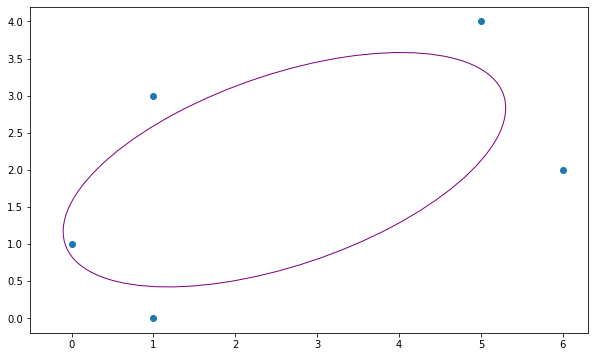

In [15]:
def pca(X):
    #We get the matrix shape
    m, N = X.shape
    #We calculate the mean value of the data (seperately for x and y values)
    mean = 1/N * np.sum(X, axis=1,keepdims=True)
    #We center the data using the mean value (from all x/y we substract the mean x/y)
    X_d = X - mean
    #Compute the covariance matrix
    C = 1/(N-1) * np.dot(X_d, X_d.T)
    #Compute the eigenvalues and eigenvectors of the covariance matrix by using the SVD
    U, S, VT = np.linalg.svd(C)
    #COLUMNS of U are the eigenvectors
    #values of S are the eigenvalues
    #We return all of this because we need it for the next tasks
    return C, mean, U, S, VT

def task_b():
    #Read the points file
    X = np.loadtxt("data\points.txt")
    #Reshape it so it becomes a 2xN matrix
    X = X.reshape(-1,2).T
    C, mean, _, _, _ = pca(X)
    #We plot the points and draw the elipse
    plt.figure(figsize=(10,6))
    plt.scatter(X[0], X[1])
    a6_utils.drawEllipse(mean, C, n_std=1)
    plt.show()

task_b()

### Task c

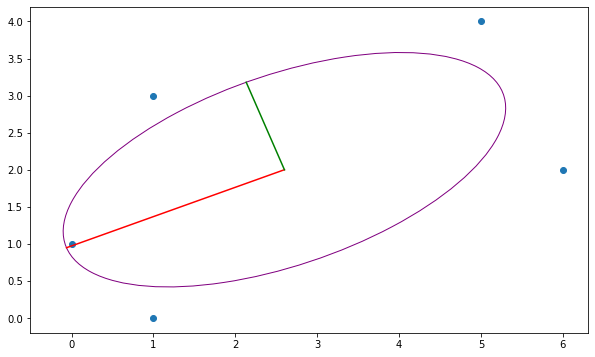

In [16]:
def task_c():
    #Read the points file and reshape it so it becomes a 2xN matrix
    X = np.loadtxt("data\points.txt").reshape(-1,2).T
    #Get the covariance matrix, the mean value, the eigenvectors and the eigenvalues
    C, mean, U, S, _ = pca(X)
    #We plot the points and draw the elipse
    plt.figure(figsize=(10,6))
    plt.scatter(X[0], X[1])
    a6_utils.drawEllipse(mean, C, n_std=1)
    #We square root the eigenvalues (otherwise it doesn't work)
    S = np.sqrt(S)
    #We plot the eigenvectors sclaled by the eigenvalues
    plt.plot([mean[0], mean[0] + U[0,0] * S[0]], [mean[1], mean[1] + U[1,0] * S[0]], color='red')
    plt.plot([mean[0], mean[0] + U[0,1] * S[1]], [mean[1], mean[1] + U[1,1] * S[1]], color='green')
    plt.show()

task_c()

### Task d

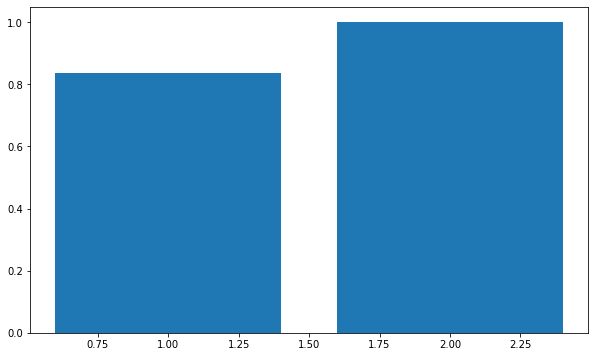

In [17]:
def task_d():
    #Read the points file and reshape it so it becomes a 2xN matrix
    X = np.loadtxt("data\points.txt").reshape(-1,2).T
    #Get the covariance matrix, the mean value, the eigenvectors and the eigenvalues
    _, _, _, S, _ = pca(X)
    #We plot the eigenvalues using the bar plot
    plt.figure(figsize=(10,6))
    #We plot the cumulative sum of the eigenvalues (we divide by the sum of the eigenvalues so we normalize it)
    #Cumulative sum (cumsum) of array [1,2,3] is [1,3,6], of array [1,1,1] is [1,2,3]
    #So the second array element is the sum of the first and itself, the third is the sum of the first, second and itself and so on
    #The last element is the sum of all the elements, that's why we divide by the sum of the eigenvalues to normalize it
    plt.bar([1,2], np.cumsum(S)/np.sum(S))
    plt.show()

task_d()

### Task e

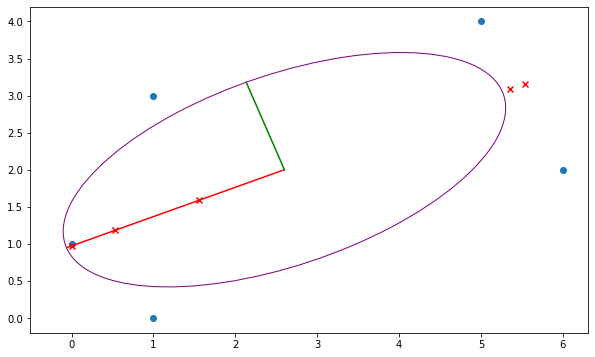

In [18]:
def task_e():
    #Read the points file and reshape it so it becomes a 2xN matrix
    X = np.loadtxt("data\points.txt").reshape(-1,2).T
    #Get the covariance matrix, the mean value, the eigenvectors and the eigenvalues
    C, mean, U, S, _ = pca(X)

    #project the points in the PCA space
    X_new = np.dot(U.T, X - mean)
    #We remove the components from U that have the lowest eigenvalue
    newU = np.copy(U)
    newU[:,-1] = 0
    #We project the points back to the original space
    X_new = np.dot(newU, X_new) + mean

    #We plot the original points, the projected points, the elipse and the eigenvectors (in that order)
    plt.figure(figsize=(10,6))
    plt.scatter(X[0], X[1])
    plt.scatter(X_new[0], X_new[1], marker='x', color='red')
    a6_utils.drawEllipse(mean, C, n_std=1)
    S = np.sqrt(S)
    plt.plot([mean[0], mean[0] + U[0,0] * S[0]], [mean[1], mean[1] + U[1,0] * S[0]], color='red')
    plt.plot([mean[0], mean[0] + U[0,1] * S[1]], [mean[1], mean[1] + U[1,1] * S[1]], color='green')
    plt.show()

task_e()

### Task f

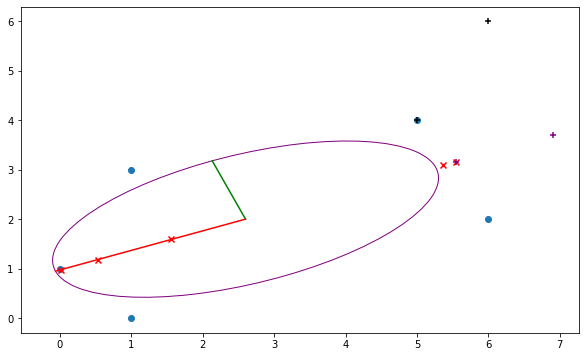

In [19]:
def task_f():
    #Read the points file and reshape it so it becomes a 2xN matrix
    X = np.loadtxt("data\points.txt").reshape(-1,2).T
    #Get the covariance matrix, the mean value, the eigenvectors and the eigenvalues
    C, mean, U, S, _ = pca(X)

    #New points q = [6,6]T
    q = np.array([[6],[6]])

    #Calculate the closest point to q using euclidean distance
    #1.calculate all the distances
    distances = np.sqrt((q[0][0] - X[0,:])**2 + (q[1][0] - X[1,:])**2)
    #2.find the index of the minimum distance
    index = np.where(distances == min(distances))[0][0]
    #3.get the point with that index
    closest_point = X[:,index]

    #Project the points to the PCA space
    X_new = np.dot(U.T, X - mean)
    q_new = np.dot(U.T, q - mean)
    #Remove the component with the lowest eigenvalue
    newU = np.copy(U)
    newU[:,-1] = 0
    #We project the points back to the original space
    X_new = np.dot(newU, X_new) + mean
    q_new = np.dot(newU, q_new) + mean

    #We calculate the distances again and find the new closest point
    distances_new = np.sqrt((q_new[0][0] - X_new[0,:])**2 + (q_new[1][0] - X_new[1,:])**2)
    index_new = np.where(distances_new == min(distances_new))[0][0]
    closest_point_new = X_new[:,index_new]

    #We plot the original points, the projected points, the elipse and the eigenvectors (in that order)
    plt.figure(figsize=(10,6))
    plt.scatter(X[0], X[1])
    plt.scatter(X_new[0], X_new[1], marker='x', color='red')
    a6_utils.drawEllipse(mean, C, n_std=1)
    S = np.sqrt(S)
    plt.plot([mean[0], mean[0] + U[0,0] * S[0]], [mean[1], mean[1] + U[1,0] * S[0]], color='red')
    plt.plot([mean[0], mean[0] + U[0,1] * S[1]], [mean[1], mean[1] + U[1,1] * S[1]], color='green')
    plt.scatter(q[0], q[1], marker='+', color='black')
    plt.scatter(closest_point[0], closest_point[1], marker='+', color='black')
    plt.scatter(q_new[0], q_new[1], marker='+', color='purple')
    plt.scatter(closest_point_new[0], closest_point_new[1], marker='+', color='purple')
    plt.show()
    #Black + are the point q and it's closest point in the original space
    #Purple + are the point q and it's closest point after the transformation

task_f()

## Exercise 2

### Task a

In [20]:
def dualPca(X):
    #We get the matrix shape
    m, N = X.shape
    #We calculate the mean value of the data (seperately for x and y values)
    mean = 1/N * np.sum(X, axis=1,keepdims=True)
    #We center the data using the mean value (from all x/y we substract the mean x/y)
    X_d = X - mean
    #Compute the covariance matrix
    C = 1/(N-1) * np.dot(X_d.T, X_d)
    #Compute the singular value decomposition
    U, S, VT = np.linalg.svd(C)
    #Compute the basis of the eigenvector space ???
    U = X_d @ U @ np.diag(np.sqrt(1/(S*(N-1))))
    return C, mean, U, S, VT

def task_a():
    #Read the points file and reshape it so it becomes a 2xN matrix
    X = np.loadtxt("data\points.txt").reshape(-1,2).T
    #Get the covariance matrix, the mean value, the eigenvectors and the eigenvalues
    _, _, U1, _, _ = pca(X)
    _, _, U2, _, _ = dualPca(X)
    print(U1)
    print(U2)

task_a()

[[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
[[ 9.29929353e-01 -3.67738219e-01 -1.38575601e-09  3.31219041e-08
   1.82942103e-08]
 [ 3.67738219e-01  9.29929353e-01  4.95269204e-09  1.27043818e-08
   3.22049582e-08]]


### Task b

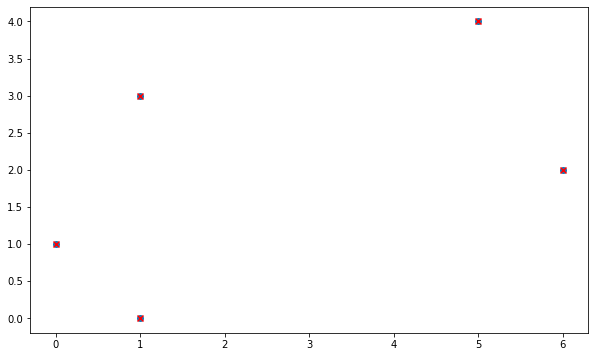

In [21]:
def task_b():
    #Read the points file and reshape it so it becomes a 2xN matrix
    X = np.loadtxt("data\points.txt").reshape(-1,2).T
    #Get the covariance matrix, the mean value, the eigenvectors and the eigenvalues
    C, mean, U, S, _ = dualPca(X)

    #project the points in the PCA space
    X_new = np.dot(U.T, X - mean)
    #We project the points back to the original space
    X_new = np.dot(U, X_new) + mean

    #We plot the original points and the projected points to see if they match
    plt.figure(figsize=(10,6))
    plt.scatter(X[0], X[1])
    plt.scatter(X_new[0], X_new[1], marker='x', color='red')
    plt.show()

task_b()

## Exercise 3

### Task a

In [22]:
def preparation(path="data/faces/1"):
    img_names = listdir(path)
    images = []

    for image in img_names:
        images.append(cv2.cvtColor(cv2.imread(f'{path}/{image}'), cv2.COLOR_RGB2GRAY).flatten())

    return np.asarray(images).T

### Task b

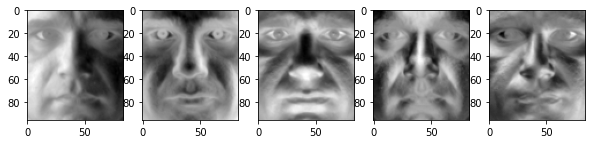

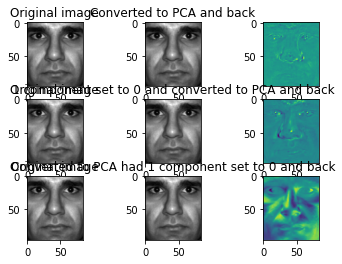

In [23]:
def task_b():
    #Get the images matrix
    images = preparation()
    #Use the dualPCA on the matrix
    C, mean, U, S, VT = dualPca(images)

    #Plot the first 5 eigenvectors
    plt.figure(figsize=(10,3))
    
    #What we see are the first 5 most important eigenvectors, when we want to construct a face,
    #we will combine some of these vectors along with some other to get the face we want
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(np.reshape(U[:,i], (96, 84)), cmap="gray")
    plt.show()

    #We get the image of a face
    image = cv2.cvtColor(cv2.imread("data/faces/1/001.png"), cv2.COLOR_RGB2GRAY)
    
    #IMAGE 1
    #Convert the image to a vector
    X_1 = np.reshape(np.copy(image), (-1,1))
    #project the points in the PCA space
    X_1 = np.dot(U.T, X_1 - mean)
    #We project the points back to the original space
    X_1 = np.dot(U, X_1) + mean
    image_1 = np.reshape(X_1, image.shape)

    #IMAGE 2
    #Convert the image to a vector
    X_2 = np.reshape(np.copy(image), (-1,1))
    #Change 1 compontnt to 0
    X_2[4074] = 0
    #project the points in the PCA space
    X_2 = np.dot(U.T, X_2 - mean)
    #We project the points back to the original space
    X_2 = np.dot(U, X_2) + mean
    image_2 = np.reshape(X_2, image.shape)

    #IMAGE 3
    #Convert the image to a vector
    X_3 = np.reshape(np.copy(image), (-1,1))
    #project the points in the PCA space
    X_3 = np.dot(U.T, X_3 - mean)
    #change one of its componenets while in PCA space
    X_3[4] = 0
    #We project the points back to the original space
    X_3 = np.dot(U, X_3) + mean
    image_3 = np.reshape(X_3, image.shape)
    

    plt.subplot(3, 3, 1)
    plt.imshow(image, cmap="gray")
    plt.title(f'Original image')
    plt.subplot(3, 3, 2)
    plt.imshow(image_1, cmap="gray")
    plt.title(f'Converted to PCA and back')
    plt.subplot(3,3,3)
    plt.imshow(image - image_1)

    plt.subplot(3, 3, 4)
    plt.imshow(image, cmap="gray")
    plt.title(f'Original image')
    plt.subplot(3, 3, 5)
    plt.imshow(image_2, cmap="gray")
    plt.title(f'1 component set to 0 and converted to PCA and back')
    plt.subplot(3, 3, 6)
    plt.imshow(image - image_2)

    plt.subplot(3, 3, 7)
    plt.imshow(image, cmap="gray")
    plt.title(f'Original image')
    plt.subplot(3, 3, 8)
    plt.imshow(image_3, cmap="gray")
    plt.title(f'Converted to PCA had 1 component set to 0 and back')
    plt.subplot(3, 3, 9)
    plt.imshow(image - image_3)


    plt.show()

task_b()

### Task c

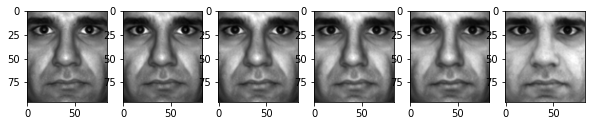

In [24]:
def task_c():
    #Get the images matrix
    images = preparation()
    #Use the dualPCA on the matrix
    C, mean, U, S, VT = dualPca(images)

    #We get the image of a face
    image = cv2.cvtColor(cv2.imread("data/faces/1/001.png"), cv2.COLOR_RGB2GRAY)
    #Convert the image to a vector
    X = np.reshape(image, (-1,1))

    plt.figure(figsize=(10,6))
    nums = [32,16,8,4,2,1]
    for i, num in np.ndenumerate(nums):
        #project the points in the PCA space
        X_pca = np.dot(U.T, X - mean)
        #Remove the component with the lowest eigenvalue
        newU = np.copy(U)
        newU[:,num:] = 0
        #We project the points back to the original space
        X_new = np.dot(newU, X_pca) + mean
        img = np.reshape(X_new, image.shape)
        plt.subplot(1,6, i[0]+1)
        plt.imshow(img, cmap="gray")
    plt.show()

task_c()

### Task d

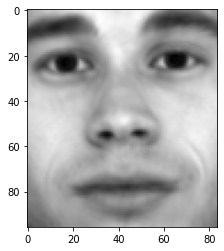

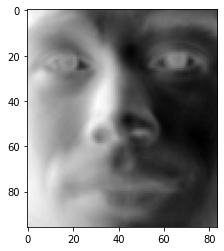

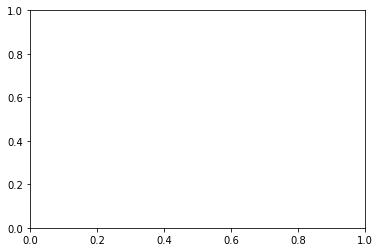

In [25]:
#explanation https://discord.com/channels/435483352011767820/626489670787923972/1056989938807230494
def task_d():
    images = preparation("data/faces/2")
    C, mean, U, S, VT = dualPca(images)

    #We get the average photo, which we get by using the mean() function on our images
    avg_img = np.reshape(images.mean(axis=1), (-1,1))
    plt.imshow(avg_img.reshape((96,84)), cmap="gray")
    plt.show()

    #We project this average face to PCA space
    avg_pca = np.dot(U.T, avg_img - mean)
    
    #We look how the 2.eigenvector looks
    snd_egn = U[:,1]
    plt.imshow(snd_egn.reshape((96,84)), cmap="gray")
    plt.show()

    #We create a range from around -10 to 10 and define the scailing factor
    range = np.linspace(-3*np.pi, 3*np.pi, 200)
    scale = 3000

    fig, ax = plt.subplots()
    
    def anim_func(i):
        #For each range we multiply the eigenvector with the range and multiply with the scare to exagerate the results
        avg_pca[1] = np.sin(range[i]) * scale
        #We convert the face back to image space
        avg_pca_img = np.dot(U, avg_pca) + mean
        #We plot the image
        ax.imshow(avg_pca_img.reshape((96, 84)), cmap="gray", vmin=0, vmax=255)

    #We do the same but with 2 eigenvectors at the same time
    def anim_func2(i):
        avg_pca[1] = np.sin(range[i]) * scale
        avg_pca[2] = np.cos(range[i]) * scale
        avg_pca_img = np.dot(U, avg_pca) + mean
        ax.imshow(avg_pca_img.reshape((96, 84)), cmap="gray", vmin=0, vmax=255)


    #Because the eigenvector for which we are changing the weight looks as it looks, we can see one side of the face 
    #getting darker when we apply more and more weight of that vector
    #In PCA space, our image gets converted to an array of 64, that represents the weights for our 64 eigenvectors
    #the first few vectors represent broader features, the latter represent the details
    animation = matplotlib.animation.FuncAnimation(fig, anim_func, frames=len(range))
    animation.resume()

    # animation = matplotlib.animation.FuncAnimation(fig, anim_func2, frames=len(range))
    # animation.resume()
    plt.show()

task_d()

### Task e

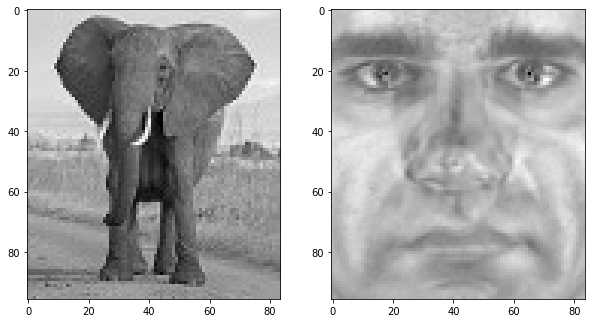

In [26]:
def task_e():
    images = preparation("data/faces/1")
    #We use the face images in the dualPca function
    C, mean, U, S, VT = dualPca(images)

    #We load the elephant image
    image = cv2.cvtColor(cv2.imread("data/elephant.jpg"), cv2.COLOR_RGB2GRAY)
    X = np.reshape(image, (-1,1))

    #We send the elephant image to the PCA space built by face images and back
    X_pca = np.dot(U.T, X - mean)
    #We project the points back to the original space
    X = np.dot(U, X_pca) + mean
    #It will try to build the elephant image back using only the eigenvectors from the faces which is not possible

    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.subplot(1,2,2)
    plt.imshow(np.reshape(X, (96,84)), cmap="gray")
    plt.show()

task_e()